# INTRODUCTION

I’m using Python's libraries such as pandas, numpy, math, SCIPY, matplotlib and seaborn for running codes on 3 datasets for understanding, shaping,tranforming  structured data and  to conduct basic data analysis.  It is a work in progress. Therefore, feel free to make changes, edits, contributions, or flag errors on that version. I will look at each suggestion then I will commit and update the suggested code improvements from my side. Do not hesitate to share it with others too. Perhaps based on your experience, you have encountered different questions or operations that may need to be included. Please share them with me, I will be more than happy to work on their illustrative python code. 

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display

# UNDERSTANDING MY DATASET

Often, my dataset is not sitting in my personal computer. They may be on the cloud, on the web, in SharePoint or simply on a server. So, I need to bring first this dataset into my laptop and then get familiar with it.  Reading the code book or metadata is key for understanding my dataset.  However, I can run codes to know (and confirm) the size of my imported dataset, the variables, variable labels, the type of each variable, and getting a sense of missing values as well as generating a preview of  my dataset. 

Question 1. How do I load my dataset?

In [2]:
d = "https://raw.githubusercontent.com/naeljb/python/main/rawdata.csv"  # providing the dataset path
df = pd.read_csv(d)    # reading the csv file and named as df 

Question 2. What is the dataset size (number of rows and columns)?

In [3]:
df.shape

(38332, 13)

Question 3. How many data points my dataset has (number rows by number of columns) ? 

In [4]:
df.size

498316

Question 4. How to get the basic info on my dataset (column name, non-null count, data type)?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38332 entries, 0 to 38331
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     38332 non-null  int64  
 1   program                                38332 non-null  object 
 2   recipient_name                         38331 non-null  object 
 3   sex                                    38331 non-null  object 
 4   age                                    38331 non-null  float64
 5   city                                   38330 non-null  object 
 6   account_number                         38332 non-null  int64  
 7   stage                                  38332 non-null  object 
 8   vulnerability_level                    38328 non-null  object 
 9   hh_size                                38332 non-null  int64  
 10  district                               38330 non-null  object 
 11  te

Question 5. What are & how to view the first five rows of my dataset?

In [6]:
df.head()

,id,program,recipient_name,sex,age,city,account_number,stage,vulnerability_level,hh_size,district,test_registration##recipient_link_key,household_status
0,16569637,test,Bunu,Female,25.0,lake worth,2016569637,selected,None,4,est,000019a4-be59-45e1-a957-0519a6ed4a0b,returnee
1,12065927,test,Musa,Female,41.0,ngomari ndolori,2012065927,selected,crisis,1,one,0001b8c4-c858-4f5c-b4c7-ad0dc0a6c156,idp
2,14282086,test,Umar,Male,24.0,miami,2014282086,selected,crisis,12,ouest,0004193c-1d0d-4763-9824-960c62b257b6,idp
3,17930547,test,ahim,Female,27.0,sabon gari 1,2017930547,selected,None,8,est,00045631-0146-4092-8772-432e03afa4af,idp
4,16910786,test,Kadi,Female,31.0,mushmiri gana,2016910786,selected,None,8,est,00046e52-0c96-493d-980b-06a9e9ee59d8,idp


Question 6. What are & how to view the last two rows of my dataset?

In [7]:
df.tail(2)

,id,program,recipient_name,sex,age,city,account_number,stage,vulnerability_level,hh_size,district,test_registration##recipient_link_key,household_status
38330,11154224,test,muru,Female,32.0,cap dubai,2011154224,selected,crisis,4,one,fffbf9ab-aea6-4b60-98c2-811d92e584cf,NaN
38331,15749502,test,Musa,Female,22.0,dakar,2115749502,selected,None,7,est,fffedbe4-512a-4237-88bb-6c1a6fc88713,idp


Question 7. What are the columns name/headers of my dataset?

In [8]:
df.columns.values

array(['id', 'program', 'recipient_name', 'sex', 'age', 'city',
       'account_number', 'stage', 'vulnerability_level', 'hh_size',
       'district', 'test_registration##recipient_link_key',
       'household_status'], dtype=object)

Question 8. What is the type of data in each column ?

In [9]:
df.dtypes

id                                         int64
program                                   object
recipient_name                            object
sex                                       object
age                                      float64
city                                      object
account_number                             int64
stage                                     object
vulnerability_level                       object
hh_size                                    int64
district                                  object
test_registration##recipient_link_key     object
household_status                          object
dtype: object

Question 9. What are the different value names in a column (ex: district column in my df dataset)?


In [10]:
df['district'].unique()

array(['est', 'one', 'ouest', 'zero', nan], dtype=object)

Question 10. Are there missing values and how many are there in each column of my dataset?

In [11]:
df.isnull().sum()

id                                          0
program                                     0
recipient_name                              1
sex                                         1
age                                         1
city                                        2
account_number                              0
stage                                       0
vulnerability_level                         4
hh_size                                     0
district                                    2
test_registration##recipient_link_key     106
household_status                         5055
dtype: int64

# SHAPING  MY DATASET

Data shaping is the phase that I should perform once I get familiar with my data, and become aware of possible pitfalls within the data that I'm  planning to use for my  analysis and application of Machin Leraning. In most simple words, data shaping is the process of consolidation of the data, BEFORE it becomes part of my data analysis. 

Question 11. How to create a  new dataset which is a subset of columns of my main dataset ?

In [12]:
subset =df[['district','sex','age','hh_size']]   # code option 1
subset.head()    # viewing the first five row of my newly created subset

,district,sex,age,hh_size
0,est,Female,25.0,4
1,one,Female,41.0,1
2,ouest,Male,24.0,12
3,est,Female,27.0,8
4,est,Female,31.0,8


In [13]:
subset1 =df.loc[:,['district','sex','age','hh_size']]  # Code option 2
subset1.head()

,district,sex,age,hh_size
0,est,Female,25.0,4
1,one,Female,41.0,1
2,ouest,Male,24.0,12
3,est,Female,27.0,8
4,est,Female,31.0,8


Question 12. How to input a datset directly (i.e : not importing it from the web or my local machin)?

In [14]:
d1 = {'c':[1,2,3,4,5,8,15,45,7,3],'b':[5,6,7,8,5,6,7,8,9,10],'income':[9,10,11,12,5,6,7,9,5,45]}
pre_test =pd.DataFrame(d1)  # creating a dataset named pre_test from inputed data d1
pre_test

,c,b,income
0,1,5,9
1,2,6,10
2,3,7,11
3,4,8,12
4,5,5,5
5,8,6,6
6,15,7,7
7,45,8,9
8,7,9,5
9,3,10,45


In [15]:
d2 = {'income':[1,2,3,4,7,9,6,45,5,12],'b':[5,6,7,8,89,5,74,90,22,11],'c':[9,10,11,12,1,6,7,8,9,11]}
post_test =pd.DataFrame(d2) #  # creating a dataset named post_test from inputed data d2
post_test

,income,b,c
0,1,5,9
1,2,6,10
2,3,7,11
3,4,8,12
4,7,89,1
5,9,5,6
6,6,74,7
7,45,90,8
8,5,22,9
9,12,11,11


Question 13. How to re-order the columns in a dataset? 

In [16]:
# How to re-order the columns in a dataset? 
pre_test=pre_test[['income','b','c']]
pre_test

,income,b,c
0,9,5,1
1,10,6,2
2,11,7,3
3,12,8,4
4,5,5,5
5,6,6,8
6,7,7,15
7,9,8,45
8,5,9,7
9,45,10,3


Question 14. How to append two datasets?    

In [17]:
# How to append two datasets?
df_appended = pd.concat([pre_test,post_test]) # appending pre and post test dateset
df_appended

,income,b,c
0,9,5,1
1,10,6,2
2,11,7,3
3,12,8,4
4,5,5,5
5,6,6,8
6,7,7,15
7,9,8,45
8,5,9,7
9,45,10,3


Question 15. How to pivot columns in rows ?

Often data found on the web is not in the appropriate format and desire shape to conduct your analysis.  The figure below illustrates a shaping operation in which you want to create a new dataset where a column needs to be considered as an index and the value of another one as a column header and a third one as the value in this table.   

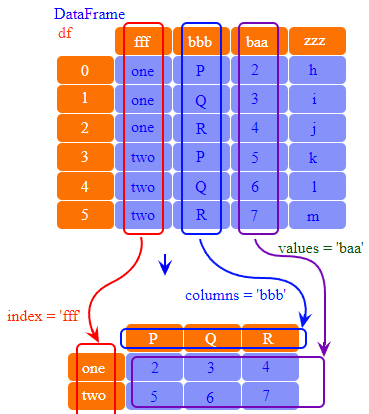

In [18]:
display.Image("C:/Users/Nael/Desktop/Fourth Article/pivoting.png")

In [19]:
table = pd.DataFrame({'fff': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bbb': ['P', 'Q', 'R', 'P', 'Q', 'R'],
                   'baa': [2, 3, 4, 5, 6, 7],
                   'zzz': ['h', 'i', 'j', 'k', 'l', 'm']})
table

,fff,bbb,baa,zzz
0,one,P,2,h
1,one,Q,3,i
2,one,R,4,j
3,two,P,5,k
4,two,Q,6,l
5,two,R,7,m


The pivot() function is used to reshaped a given DataFrame organized by given index / column values. This function does not support data aggregation, multiple values will result in a MultiIndex in the columns.

In [20]:
p_table =table.pivot(index='fff', columns='bbb', values='baa')
p_table

bbb,P,Q,R
fff,,,
one,2,3,4
two,5,6,7


Question 16. How to drop columns in a dataset?

In [21]:
df=df.drop(['program','test_registration##recipient_link_key'], axis=1)

Question 17. How to remove rows that meet certain conditions (can be used for data cleaning and mining) ? 

In [22]:
 df =df[(df['age']>=18) & (df['age']<=24) & (df['city']!='miami')] # removing all people aged between 18-23 years old  in miami 

In [23]:
df.shape # checking the new size of my dataset after removing

(5305, 11)

Question 18. How to generate a random number column? 

In [24]:
df1 = df[['id']] # here I'm creating a subset with Id to which after I will add a random number between 100 to 5000

df1['random'] = np.random.randint(100,5000,size=(len(df1),1))

print(df1.head(),'   Note: new random numbers provided everytime function is run')

          id  random
8   15358786    2356
13  11369273    3796
36  13122645    4232
37  14179654    1210
39  15741839    1870    Note: new random numbers provided everytime function is run


<ipython-input-24-9627b3f86f49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['random'] = np.random.randint(100,5000,size=(len(df1),1))


Question 19. How to rename columns? 

In [25]:
df.rename(columns={'recipient_name':'name','account_number':'account','vulnerability_level':'vulnerability','hh_size':'size','household_status':'status'},inplace=True)
df.head(2)

,id,name,sex,age,city,account,stage,vulnerability,size,district,status
8,15358786,ktar,Female,22.0,lagonav,2115358786,selected,None,4,est,host
13,11369273,iman,Female,20.0,cap dubai,2011369273,selected,crisis,3,one,NaN


Question 20. How to create a dataset that returns  matching rows from two datasets (merge-inner joint)? 

In [26]:
df2 = pd.merge(df,df1) 
print(df2.head(2), ' Note: You lose rows that don’t have a match in')

         id  name     sex   age       city     account     stage  \
0  15358786  ktar  Female  22.0    lagonav  2115358786  selected   
1  11369273  iman  Female  20.0  cap dubai  2011369273  selected   

  vulnerability  size district status  random  
0          None     4      est   host    2356  
1        crisis     3      one    NaN    3796    Note: You lose rows that don’t have a match in


For more on shaping dataset using pandas:  https://www.w3resource.com/pandas/dataframe/dataframe.php

# TRANSFORMING  MY DATA

Data transformation is the process of changing the format, structure, or values of data. Data transformation may be constructive (adding, copying, and replicating data), destructive (deleting fields and records), aesthetic , or structural (renaming, moving, and combining columns in a database). In some cases and depending of the situation, data transformation may be part of data shaping.  

Question 21. How to change the type of data of a column ?

In [27]:
df['age']=df['age'].astype('int') # from float to integer
df['id'] = df['id'].astype('float') # from integer to float

Question 22. How to replace missing values in a column by the mean ?

In [28]:
mean_age = df['age'].mean(axis=0)  # creating a variable mean (ex: for age)
mean_age

20.939679547596608

In [29]:
df['age'].replace(np.nan,mean_age,inplace =True) # replacing all missing value by mean variable

Question 23. How to replace missing values in a column by the most frequent value in that column?

In [30]:
df['district'].value_counts() # checking the frequency for each value label in my column

est      2031
ouest    1649
one      1499
zero      126
Name: district, dtype: int64

In [31]:
df['district'].value_counts().idxmax() # checking  max frequency in that colum

'est'

In [32]:
df['district'].replace(np.nan,'est',inplace =True) # replacing missing value by the most frequent value identified

24. How to add a new column by applying an operation on another column? 

In [33]:
df['indirect_bene']=df['size']*5  # creating a new column called inderect_ben which is the size multiply by 5
df.head(2)

,id,name,sex,age,city,account,stage,vulnerability,size,district,status,indirect_bene
8,15358786.0,ktar,Female,22,lagonav,2115358786,selected,None,4,est,host,20
13,11369273.0,iman,Female,20,cap dubai,2011369273,selected,crisis,3,one,NaN,15


Question 25. How to add a new column that contains a single value ? 

In [34]:
df['beneficiaries'] = '1' # creating a new column called beneficiary that contains a value 1
df.head(2)

,id,name,sex,age,city,account,stage,vulnerability,size,district,status,indirect_bene,beneficiaries
8,15358786.0,ktar,Female,22,lagonav,2115358786,selected,None,4,est,host,20,1
13,11369273.0,iman,Female,20,cap dubai,2011369273,selected,crisis,3,one,NaN,15,1


Question 26. How to create a new column  that returns a value based on a single condition applied to another column?

In [35]:
df['adulte']= df['age'].apply(lambda x: 'yes ' if x >18 else 'no') #  Code Option 1 
df.head(2)

,id,name,sex,age,city,account,stage,vulnerability,size,district,status,indirect_bene,beneficiaries,adulte
8,15358786.0,ktar,Female,22,lagonav,2115358786,selected,None,4,est,host,20,1,yes
13,11369273.0,iman,Female,20,cap dubai,2011369273,selected,crisis,3,one,NaN,15,1,yes


In [36]:
def age_range(a):              # Code option 2
    if a['age'] > 18:
        return 1
    else:
        return 0

df ['adulte1'] =df.apply(age_range,axis=1)
df.head(2)

,id,name,sex,age,city,account,stage,vulnerability,size,district,status,indirect_bene,beneficiaries,adulte,adulte1
8,15358786.0,ktar,Female,22,lagonav,2115358786,selected,None,4,est,host,20,1,yes,1
13,11369273.0,iman,Female,20,cap dubai,2011369273,selected,crisis,3,one,NaN,15,1,yes,1


Question 27. How to create a new column  that returns a value based on multiple conditions applied to another column?

In [37]:
# how to create a new column with multiple conditions applied to another column?
def age_range1(b):
    if b['age'] > 11 and b['age']<30:
        return 1
    else:
        return 0

df ['youth'] =df.apply(age_range1,axis=1)
df.head(2)

,id,name,sex,age,city,account,stage,vulnerability,size,district,status,indirect_bene,beneficiaries,adulte,adulte1,youth
8,15358786.0,ktar,Female,22,lagonav,2115358786,selected,None,4,est,host,20,1,yes,1,1
13,11369273.0,iman,Female,20,cap dubai,2011369273,selected,crisis,3,one,NaN,15,1,yes,1,1


Question 28. How to create a new column by changing the value labels of another column?

In [38]:
df['sex_num']=df.sex.map({'Female':0,'Male':1})
df.head(2)

,id,name,sex,age,city,account,stage,vulnerability,size,district,status,indirect_bene,beneficiaries,adulte,adulte1,youth,sex_num
8,15358786.0,ktar,Female,22,lagonav,2115358786,selected,None,4,est,host,20,1,yes,1,1,0
13,11369273.0,iman,Female,20,cap dubai,2011369273,selected,crisis,3,one,NaN,15,1,yes,1,1,0


Question 29. How to save the extracted, shaped and transformed dataset into a new dataset? 

In [39]:
df.to_csv('C:/Users/Nael/Desktop/mydataset.csv') # saving as my new dataset as a CSV file in my desktop 

# ANALYZING  MY DATA

Question 30. How to get the summary statistics for each numeric variable in my dataset ?

In [40]:
df.describe()

,id,age,account,size,indirect_bene,adulte1,youth,sex_num
count,5.305000e+03,5305.00000,5.305000e+03,5305.000000,5305.000000,5305.000000,5305.0,5305.000000
mean,1.410694e+07,20.93968,2.027019e+09,4.030349,20.151744,0.932516,1.0,0.028841
std,2.334538e+06,1.63511,3.419604e+07,1.639222,8.196112,0.250881,0.0,0.167374
min,1.009702e+07,18.00000,2.010097e+09,1.000000,5.000000,0.000000,1.0,0.000000
25%,1.192256e+07,20.00000,2.011923e+09,3.000000,15.000000,1.000000,1.0,0.000000
50%,1.439082e+07,20.00000,2.014391e+09,4.000000,20.000000,1.000000,1.0,0.000000
75%,1.617679e+07,22.00000,2.016848e+09,5.000000,25.000000,1.000000,1.0,0.000000
max,2.016737e+07,24.00000,2.116007e+09,14.000000,70.000000,1.000000,1.0,1.000000


Question 31. How to display a box plot for a variable by another variable ? 

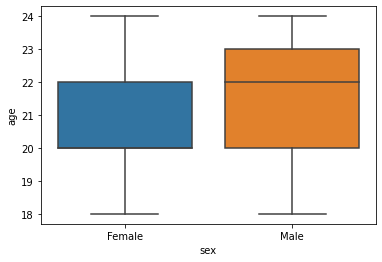

In [41]:
sns.boxplot(x='sex',y='age',data=df)
plt.show()

Question 32. How to get the upper and lower 95% intervall confidence values for a variable ? 

In [42]:
# Code option 1

n = df['age']. count() # counting number of values in the column
nsquart =math.sqrt(n)   # squar of n
mean = df['age'].mean()
std = df['age']. std()
z = stats.norm.ppf(q=0.975)
upper = mean +(z*(std/nsquart))
lower = mean -(z*(std/nsquart))
print(upper,lower)

20.98367952312403 20.895679572069184


In [43]:
# Code option 2

u_age = df['age'].mean() + (stats.norm.ppf(q=0.975)*(df['age']. std()/math.sqrt(df['age']. count())))
l_age = df['age'].mean() - (stats.norm.ppf(q=0.975)*(df['age']. std()/math.sqrt(df['age']. count())))
print (u_age,l_age)

20.98367952312403 20.895679572069184


Question 33. How to generate a table (dataset) that returns the number,percentage of each value label of a column from another dataset?

In [44]:
s = df['sex']
counts= s.value_counts()
percents=s.value_counts(normalize=True)
percents100= s.value_counts(normalize=True).mul(100).round(1).astype(str)+"%"
d2=({'#':counts,'percent':percents,'%':percents100})
sex1=pd.DataFrame(d2)
sex1

,#,percent,%
Female,5152,0.971159,97.1%
Male,153,0.028841,2.9%


Question 34. How do I generate a cross-tabulation, count between two variables ?

In [45]:
pd.crosstab(df['district'], df['sex'])

sex,Female,Male
district,,
est,1974,57
one,1466,33
ouest,1590,59
zero,122,4


Question 35. How do I display a crosstable ( count count between two variable ) or  bar chart? 

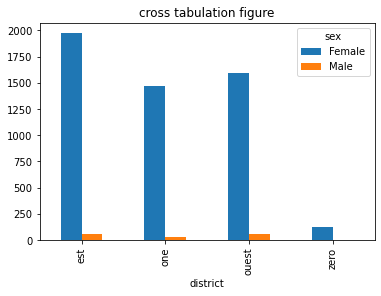

In [46]:
pd.crosstab(df['district'], df['sex']).plot(kind = 'bar')
plt.title('cross tabulation figure')
plt.show()

Question 36. How do I generate  a crosstable that provides the percentage over all values (normalized overall values) ?

In [47]:
pd.crosstab(df['district'], df['sex'], normalize ='all') 

sex,Female,Male
district,,
est,0.372102,0.010745
one,0.276343,0.006221
ouest,0.299717,0.011122
zero,0.022997,0.000754


Question 35. How do I generate a crosstable that provides the percentage over the total of each row (normalized over row) ?

In [48]:
pd.crosstab(df['district'], df['sex'], normalize ='index') #  (% or normalize over each row )

sex,Female,Male
district,,
est,0.971935,0.028065
one,0.977985,0.022015
ouest,0.964221,0.035779
zero,0.968254,0.031746


Question 37. How do I generate a crosstable that provides the percentage over the total of each column (normalized over column) ?

In [49]:
pd.crosstab(df['district'], df['sex'], normalize ='columns')  #  (% or normalize over each column )

sex,Female,Male
district,,
est,0.383152,0.372549
one,0.284550,0.215686
ouest,0.308618,0.385621
zero,0.023680,0.026144


Question 38. How to create a subset resulting from a value of a column (can be used for data mining) and then getting the summary statistics? 

In [50]:
male_df = df[df['sex']=='Male']  # creating my subset of "male" from "sex" column (data mining)
male_df.describe()

,id,age,account,size,indirect_bene,adulte1,youth,sex_num
count,1.530000e+02,153.000000,1.530000e+02,153.000000,153.000000,153.000000,153.0,153.0
mean,1.410892e+07,21.398693,2.024566e+09,4.738562,23.692810,0.967320,1.0,1.0
std,2.446506e+06,1.683276,3.130563e+07,2.123711,10.618554,0.178381,0.0,0.0
min,1.013078e+07,18.000000,2.010131e+09,1.000000,5.000000,0.000000,1.0,1.0
25%,1.174767e+07,20.000000,2.011748e+09,3.000000,15.000000,1.000000,1.0,1.0
50%,1.466892e+07,22.000000,2.014669e+09,4.000000,20.000000,1.000000,1.0,1.0
75%,1.633461e+07,23.000000,2.016608e+09,6.000000,30.000000,1.000000,1.0,1.0
max,1.816131e+07,24.000000,2.115999e+09,11.000000,55.000000,1.000000,1.0,1.0


In [51]:
female_df = df[df['sex'] == 'Female']  # creating my subset of "female" group of "sex" column
female_df.describe()

,id,age,account,size,indirect_bene,adulte1,youth,sex_num
count,5.152000e+03,5152.000000,5.152000e+03,5152.000000,5152.000000,5152.000000,5152.0,5152.0
mean,1.410688e+07,20.926048,2.027092e+09,4.009317,20.046584,0.931483,1.0,0.0
std,2.331379e+06,1.631853,3.427826e+07,1.618158,8.090788,0.252656,0.0,0.0
min,1.009702e+07,18.000000,2.010097e+09,1.000000,5.000000,0.000000,1.0,0.0
25%,1.193459e+07,20.000000,2.011935e+09,3.000000,15.000000,1.000000,1.0,0.0
50%,1.438219e+07,20.000000,2.014382e+09,4.000000,20.000000,1.000000,1.0,0.0
75%,1.616660e+07,22.000000,2.016853e+09,5.000000,25.000000,1.000000,1.0,0.0
max,2.016737e+07,24.000000,2.116007e+09,14.000000,70.000000,1.000000,1.0,0.0


Question 39. How to group data by category of value labels in a column and apply a calculation to these categories? 

        Ex: createing a table showing the mean age by district from dataset df

In [52]:
df['district'].unique()  # checking district value label

array(['est', 'one', 'ouest', 'zero'], dtype=object)

In [53]:
x = df[['age','district']]  # Creatingt a subset with age and district 

In [54]:
x = x.groupby (['district']).mean() #  grouping by distrinct while calculationg mean by district (groupby function) 
x

,age
district,
est,20.985721
one,21.002001
ouest,20.794421
zero,21.357143


Question 40. Are the means of two groups (or value labels) within the same variable/column (of the same dataset) satisticaly different?

In [55]:
from scipy.stats import ttest_ind  # importing T-test from stats library 

In [56]:
TwoTail = ttest_ind(male_df['age'],female_df['age'],equal_var = True)  # ex:  Age mean T-test betwen Male & Female 
print(TwoTail,"\n  Note: if p-value less than 0.05 then means are statistically different")

Ttest_indResult(statistic=3.5273342582385983, pvalue=0.00042332017764340143) 
  Note: if p-value less than 0.05 then means are statistically different


Question 41. Are the means for a variable  taken at two different times (two datasets) statistically different?

In [57]:
income_before = pre_test['income'] 

In [58]:
income_after = post_test['income']

In [59]:
from scipy.stats import ttest_rel

ttest_pair = ttest_rel(income_before,income_after)
ttest_pair

Ttest_relResult(statistic=0.4658025705334026, pvalue=0.6524236776514067)

In [60]:
deg_free =(len(income_before) + len(income_after)) - 1
deg_free

19

Question 42. Are the proportions for a variable  taken at two different times (two datasets) statistically different?

For illustration, I want to know if there is a significant difference between the percentage of households who had latrine in a survey conducted twice (in 2020 & 2021). I state the hypothesis test as:

    Null hypothesis : p1 - p2 = 0 ( no difference between the percentage of 2020 & 2021)
    Alternative hypothesis  : p1 -p2 not equal to 0


In [61]:
import statsmodels.api as sm

In [62]:
# Fixing the variables and their repective values

n1 = 64098   #  dataset sample size in 2020
p1 = 0.0286  # 2.86 % households had a latrine in 2020
n2 = 65000   #  dataset sample size in 2021
p2 = 0.0385   # 3.85 % households had a latrine in 2021

In [63]:
# Calling the function to run the test

survey1 = np.random.binomial(1,p1,n1)
survey2 = np.random.binomial(1,p2,n2)
test = sm.stats.ttest_ind(survey1,survey2)

In [64]:
# Extracting and printing  values from the test

t = test[0]    #  extracting t value
p = test[1]    # extractubg p value
d = test [2]   # extracting degree of freedom

print (p)

1.966870261089306e-24


In [65]:
# Decision rule and test conclusion

if p < 0.5:
    print('Conclusion: the percentages are statistically different, null hypothesis rejected')
else:
    print ('Conclusion: the percentages are statistically equal, null hypothesis accepted')

Conclusion: the percentages are statistically different, null hypothesis rejected


The following codes are run for correlation analysis and for predictive & linear regression.  A new dataset (FuelConsumptionCo2) is used and can be found in my gihub account 

In [66]:
e= "https://raw.githubusercontent.com/naeljb/python/main/FuelConsumptionCo2.csv"

In [67]:
df4 = pd.read_csv(e) 

In [68]:
cdf = df4[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS','FUELTYPE']]

Question 43. Are there correlations among the variables ? 

Correlation describes an association between variables: when one variable changes, so does the other. A correlation is a statistical indicator of the relationship between variables. These variables change together: they covary. But this covariation isn’t necessarily due to a direct or indirect causal link.

Causation means that changes in one variable brings about changes in the other; there is a cause-and-effect relationship between variables. The two variables are correlated with each other and there is also a causal link between them.

A correlation doesn’t imply causation, but causation always implies correlation.

In [69]:
# Code option 1: All variables & generating a table for the pearson coefficient

cdf.corr()  

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.776788,0.849685
FUELCONSUMPTION_COMB,0.819482,0.776788,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.892129,1.000000


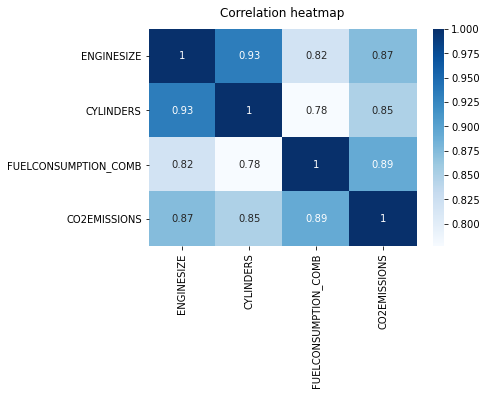

In [70]:
# Code option 2: All variables  & generating a heatmap with the pearson correlation coefficient 

heatmap= sns.heatmap(cdf.corr(),cmap = 'Blues', annot = True)  
heatmap.set_title('Correlation heatmap', pad =12)
plt.show()

In [71]:
# Option 3: Looking only at 2 variables and generating both the Pearson coefficient and p-value 

pearson_coef,p_value = stats.pearsonr(cdf['ENGINESIZE'],cdf['CO2EMISSIONS'])
print ("The pearson Correlation coefficient is" ,pearson_coef,  "with a p_value of", p_value,"\n if p-value is less than 0.001, there is strong evidence that the correlationis significant","\n if p-value is less than 0.05 = moderate evidence, less than 0.01 = weak evidence, more than 0.1 = no evidence")

The pearson Correlation coefficient is 0.8741543683958106 with a p_value of 0.0 
 if p-value is less than 0.001, there is strong evidence that the correlationis significant 
 if p-value is less than 0.05 = moderate evidence, less than 0.01 = weak evidence, more than 0.1 = no evidence


Speraman's coerfficient measures the dependence between rankings variables. The relative order matters and not the actual numerical values.

In [72]:
spearman_coef,p_value= stats.spearmanr(cdf['ENGINESIZE'],cdf['CO2EMISSIONS'])
print ("The spearman coefficient is" ,spearman_coef,  "with a p_value of", p_value)

The spearman coefficient is 0.8899725161148536 with a p_value of 0.0


A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. 

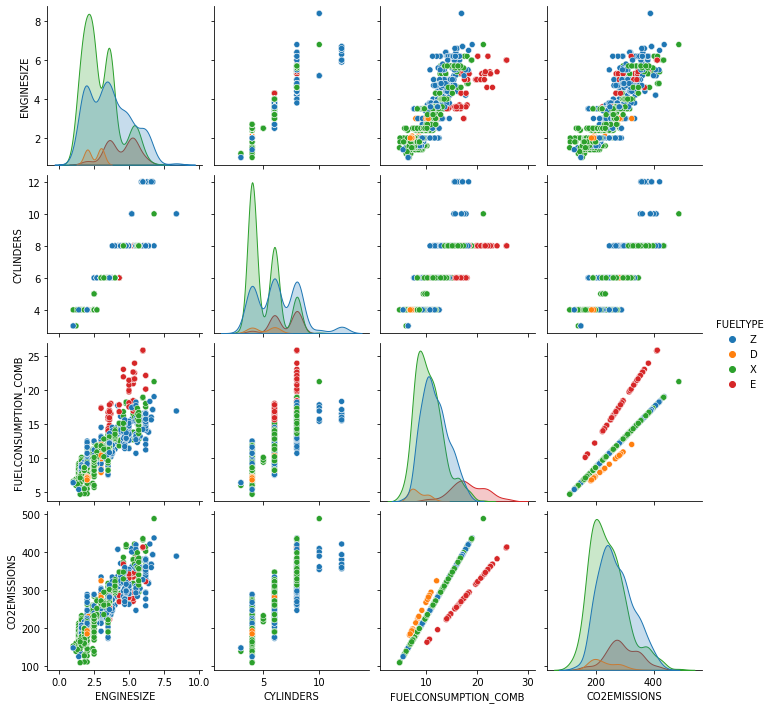

In [73]:
sns.pairplot(data=cdf, hue="FUELTYPE")
plt.show()   

Machine learning (ML) is the study of computer algorithms that can improve automatically through experience and by the use of data.  Machine learning algorithms build a model based on sample data, known as training data, in order to make predictions or decisions without being explicitly programmed to do so. There are two types of ML: 

* Supervised Machin Learning (SML): This is a technique of machine learning where labeled datasets are used to train an algorithm to determine the likelihood of a future event happening based on past occurrences of such an event.  Some of SML methods include Naïve bayes, Linear regression, logistic regression, SVM, KNN and Random forest.


* Unsupervised learning is a technique of machine learning where hidden patterns are uncovered from unlabelled datasets. Some of UML includes clustering methods. 


Question 44. How to randomly split a dataset into training and testing sets?

Separating data into training and testing sets is an important step for applying Machin Learning and evaluating the model  . Typically, when you separate a data set into a training set and testing set, most of the data is used for training, and a smaller portion of the data is used for testing. By using similar data for training and testing, you can minimize the effects of data discrepancies and better understand the characteristics of the model.After a model has been processed by using the training set, you test the model by making predictions against the test set. Because the data in the testing set already contains known values for the attribute that you want to predict, it is easy to determine whether the model's guesses are correct.

In addition, when spliting my dataset into a train and test set, I increase my "out of sample Accuracy" which is the  percentage of correct predictions that my model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of sample accuracy, due to the likelihood of being over-fit. It is therefore  important that my models have a high, out-of-sample accuracy, because the purpose of any model, ofcourse, is to make correct predictions on unknown data.

In [74]:
# Code Option 1,  using Numpy library

msk = np.random.rand(len(df4)) < 0.8  # 80% of the entire dataset for training & 20% for testing
train = cdf[msk]
test = cdf[~msk]

In [75]:
cdf.shape # checking cdf dataset size

(1067, 5)

In [76]:
train.shape # checking training set size

(868, 5)

In [77]:
test.shape # checking testing set size

(199, 5)

Code Option 2:  you can also use  Machin Learning  Library 'sklearn to split you dataset into training and testing set.  However, you need first to define the Dependent and independent variable. See the Logistic classification code below (question 49).  

Maching Leraning (supervised and unsupervised

Question 45. How to model the relationship between a scalar response and one explanatory variable (simple linear model)? 

Linear regression is a Supervised Learning Maching that models the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable. In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data.

In [78]:
from sklearn import linear_model # importing linear model module from Sklearn Library
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)

print(' The intercep is:  ', regr.intercept_, ' and the predictor is: ', regr.coef_)  

 The intercep is:   [123.04112426]  and the predictor is:  [[40.04677596]]


Question 46.  How do I graph the variables'relationship (scatter plot) and the linear fitting line ?

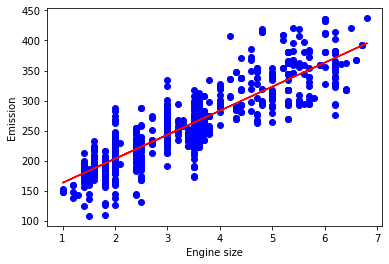

In [79]:
# Code option 1 on training set

plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') 
plt.xlabel('Engine size')
plt.ylabel ('Emission')
plt.show()

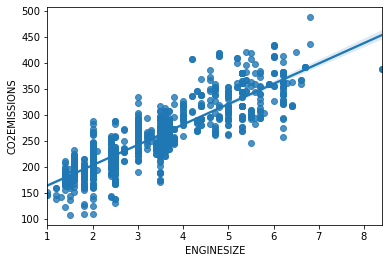

In [80]:
# Code option 2 on full dataset

ax = sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data=cdf)

Question 47. To what extent my linear model correctly predicts the dependent variable ?

Model evaluation compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement. R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)

In [81]:
from sklearn.metrics import r2_score  # importing r-square module from sklearn library
test_x = np.asanyarray(train[['ENGINESIZE']])  # converting dataframe into numpy array
test_y = np.asanyarray(train[['CO2EMISSIONS']]) # converting dataframe into numpy array
test_y_ = regr.predict(test_x)

r = r2_score(test_y, test_y_)
print('R score is: ',r)

R score is:  0.7747532435279433


Question 48. How to model the relationship between a scalar response and more than one explanatory variables (multiple linear model)? 

In [82]:
# what is the estimated multiple linear regresion ?
regr1 = linear_model.LinearRegression()
train_x1 = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y1 = np.asanyarray(train[['CO2EMISSIONS']])
regr1.fit(train_x1,train_y1)
print ('Intercept: ',regr1.intercept_)
print ('Coefficients: ', regr1.coef_)

Intercept:  [65.61660467]
Coefficients:  [[12.09305296  7.21556945  9.38900001]]


Accuracy of my multiple linear model? 

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the
parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the
differences between the target dependent variable and those predicted by the linear function. In other words, it
tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y)
and our predicted output over all samples in the dataset. The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

In [83]:
y1_hat= regr1.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x1 = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y1 = np.asanyarray(test[['CO2EMISSIONS']]) 

MSE  = np.mean((y1_hat - y1)**2)  # getting the Mean Square Error (means square difference between predicted and actual)
MSE

567.8445528320149

In [84]:
variance = regr1.score(x1,y1) # 1 is the perfect prediction
variance

0.8522991774684627

Question 49. How can I predict a binary variable such as yes/no  (logistic classification model)? 

Logistic Regression is a classification technique used in Supervised Machine Learning. It uses a logistic function to model the dependent variable. The dependent variable is dichotomous in nature, i.e. there could only be two possible classes (eg.: either a food insecure household  or not). As a result, this technique is used while dealing with binary data. For the purpose of generating an logistic regression, I'm using a new dataset called 'ChurnData which you can find in my github account.  This log regression will  predict food security/fs  status  (food insecure =1 and not food insecure =0 ) looking at the farm size, age, income, total household of  income,  # employee on farm and presence of secondary  source of income as predictors.   

In [85]:
f= 'https://raw.githubusercontent.com/naeljb/python/main/ChurnData.csv'

In [86]:
df5 = pd.read_csv(f)  # reading my dataset 

In [87]:
# Definining the predictors (independent variable)

x = np.asarray(df5[['land','age','income','HH_income','employee','second']])

In [88]:
# Defining the dependent variable 
y = np.asarray(df5['fs'])

Normalize Data: data Standardization give data zero mean and unit variance

In [89]:
# Normalizing the dataset or x

from sklearn.preprocessing import StandardScaler # importing the library for normalizing 

In [90]:
x = StandardScaler().fit(x).transform(x) # normalizing 
print(x)

[[-1.13518441 -0.62595491 -0.4588971   0.4751423  -0.58477841 -0.85972695]
 [-0.11604313 -0.62595491  0.03454064 -0.32886061 -1.14437497 -0.85972695]
 [-0.57928917 -0.85594447 -0.261522   -0.35227817 -0.92053635 -0.85972695]
 ...
 [-1.36680743 -0.7026181  -0.16283445 -0.21957866 -0.02518185 -0.85972695]
 [-0.53296457 -0.85594447 -1.14970993 -0.39130744 -0.58477841 -0.85972695]
 [ 1.18104577  0.67731925  0.42929083  0.89665839  1.31784991  1.16316   ]]


for mor info: https://www.youtube.com/watch?v=ZddUwo4R5ug

In [91]:
# Slipting into train and testing set (code option 2)

from sklearn.model_selection import train_test_split # importing train/test module
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state =4)  # spliting into training of 80%
print('train set', x_train.shape, y_train.shape)                                               

train set (160, 6) (160,)


The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to
solve the overfitting problem in machine learning models. C parameter indicates inverse of regularization
strength which must be a positive float. Smaller values specify stronger regularization. Now lets fit our model
with train set:

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

Now I can predict using my test set (for illustration, I'm predicting the first 10 households in my test set)

In [93]:
yhat = LR.predict(x_test)
yhat[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the
probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [94]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob[0:10]

array([[0.55084393, 0.44915607],
       [0.58894579, 0.41105421],
       [0.54561547, 0.45438453],
       [0.63735317, 0.36264683],
       [0.55707784, 0.44292216],
       [0.53654226, 0.46345774],
       [0.53504402, 0.46495598],
       [0.58883148, 0.41116852],
       [0.41941097, 0.58058903],
       [0.62707511, 0.37292489]])

How precise is my logistic classification Model ?

Option 1: Confusion Matrix
    
A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier. It can be used to evaluate the performance of a classification model through the calculation of performance metrics like accuracy, precision, recall, and F1-score.

In [95]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
     """
     This function prints and plots the confusion matrix.
     Normalization can be applied by setting `normalize=True`.
     """
     if normalize:
         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
         print("Normalized confusion matrix")
     else:
         print('Confusion matrix, without normalization')
     print(cm)
     plt.imshow(cm, interpolation='nearest', cmap=cmap)
     plt.title(title)
     plt.colorbar()
     tick_marks = np.arange(len(classes))
     plt.xticks(tick_marks, classes, rotation=45)
     plt.yticks(tick_marks, classes)
 
     fmt = '.2f' if normalize else 'd'
     thresh = cm.max() / 2.
     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
         plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
     plt.tight_layout()
     plt.ylabel('True label')
     plt.xlabel('Predicted label')
    
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 2 23]]


Confusion matrix, without normalization
[[ 6  9]
 [ 2 23]]


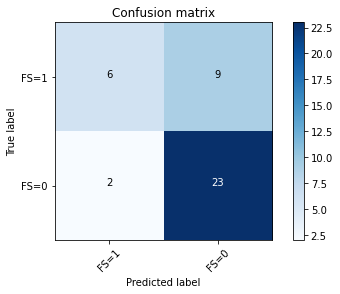

In [96]:
# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['FS=1','FS=0'],normalize= False, title=
'Confusion matrix')

The first row is for households whose actual Food Security status (FS) value in test set is 1. 
Out of 40 households, the food security status value of 15 of them is 1. And out of these 15, the classifier correctly predicted 6 of them as 1, and 9 of them as 0.

It means, for 6 households, the actual FS value status were 1 in test set, and classifier also correctly predicted those as 1. However, while the actual label of 9 household were 1, the classifier predicted those as 0, which is not very
good. I consider it as error of my model for first row.

What about the household with FS status value 0? Looking at the second row, there were 25 household whom their FS value were 0. The classifier correctly predicted 23 of them as 0, and two of them wrongly as 1. So, it has done a good job in predicting the household  with FS value 0. 

A good thing about confusion matrix is that shows the model’s ability to correctly predict or separate the classes. In specific case of binary classifier, such as this example, I can interpret these numbers as the count of True Positives, False Positives, True Negatives, and False Negatives.

Generating a logistic classification report:  

Based on the count of each section, I can calculate precision and recall of each label:

* Precision is a measure of the accuracy provided that a class label has been predicted.It is defined by:precision = TP / (TP+FP). In my example, for FS =1  it would be 6/(6+2) = 0.75

* Recall is true positive rate. It is defined as: Recall = TP / (TP + FN)

Now I'm  in the position to calculate the F1 scores for each label based on the precision and recall
of that label. The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1
(perfect precision and recall) and worst at 0. It is a good way to show that my classifer has a good value for both recall and precision. And finally, I can tell the average accuracy for my classifier is the average of the F1-score for both labels,
which is 0.70 .

In [97]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81        25
           1       0.75      0.40      0.52        15

    accuracy                           0.73        40
   macro avg       0.73      0.66      0.66        40
weighted avg       0.73      0.72      0.70        40



Option 2: Log Loss
 
In logistic regression, the output can be the probability of household  status is  food insecurity (status  is yes or equals to 1). This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [98]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6099869851297564

Question 50. How can I classify a new data point based on how its neighbors are classified? 

KNN: K Nearest Neighbor is a algorithms in Supervise Machine Learning. It classifies the data point on how its neighbor is classified. New data points are classified based on the similarity measure of the earlier stored data points. For example, I have a dataset on individuals characteristics (income, age, household size) that includes also the level of vulnerability (none, crisis, emergency) for each  individual. KNN will store similar measures. And, when a new individual comes, it will check its similarity with the characteristics and vulnerability then will classify this new individual level of vulnerability. K represents the number of the nearest neighbors (households) that I want used to classify my new data points (households) in term of vulnerability.

for more info: https://towardsdatascience.com/knn-algorithm-what-when-why-how-41405c16c36f

To illustrate that, I'm using my dataset called df. But, before I need to do some data transformation so that my KNN algorithm do not generate errors. 

In [99]:
# Checking the value label for vulnerability 

df['vulnerability'].unique() 

array(['None', 'crisis', nan], dtype=object)

In [100]:
# Treating my missing values (nan). I'm assuming missing values are emergency label

df['vulnerability'].replace(np.nan,"emergency",inplace =True)   

In [101]:
# Checking to ensure that my missing values (nan) were replaced by emergency

df['vulnerability'].unique() 

array(['None', 'crisis', 'emergency'], dtype=object)

In [102]:
# Transforming vulnerability variable into a new integer variable for runing KNN algorithm

df['vulnerability1']=df.vulnerability.map({'None':0,'crisis':1, 'emergency':2}) 

In [103]:
# checking transformation 

df['vulnerability1'].unique() 

array([0, 1, 2], dtype=int64)

In [104]:
# Checking data type for my new created variable 

df['vulnerability1'].dtypes 

dtype('int64')

In [105]:
# Checking the number of values for each value label

df['vulnerability1'].value_counts()

1    3496
0    1808
2       1
Name: vulnerability1, dtype: int64

To use scikit-learn library, I have to convert the Pandas data frame to a Numpy array

In [106]:
# Code option 1  for converting Pandas data frame to Numpy array

x1 = np.asarray(df[['id','age','size','indirect_bene']])
x1[0:5]

array([[1.54e+07, 2.20e+01, 4.00e+00, 2.00e+01],
       [1.14e+07, 2.00e+01, 3.00e+00, 1.50e+01],
       [1.31e+07, 2.00e+01, 4.00e+00, 2.00e+01],
       [1.42e+07, 2.00e+01, 6.00e+00, 3.00e+01],
       [1.57e+07, 2.00e+01, 3.00e+00, 1.50e+01]])

In [107]:
# Code option 2  for converting Pandas data frame to Numpy array

x1 = df[['id','age','size','indirect_bene']].values
x1[0:5]

array([[1.54e+07, 2.20e+01, 4.00e+00, 2.00e+01],
       [1.14e+07, 2.00e+01, 3.00e+00, 1.50e+01],
       [1.31e+07, 2.00e+01, 4.00e+00, 2.00e+01],
       [1.42e+07, 2.00e+01, 6.00e+00, 3.00e+01],
       [1.57e+07, 2.00e+01, 3.00e+00, 1.50e+01]])

In [108]:
y1 = df['vulnerability1'].values
y1[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [109]:
# Normalization and to float data type
# no need to import again normalization module as this was done above under the log classification 

x1 = StandardScaler().fit(x1).transform(x1.astype(float))
x1[0:5]

array([[ 0.54,  0.65, -0.02, -0.02],
       [-1.17, -0.57, -0.63, -0.63],
       [-0.42, -0.57, -0.02, -0.02],
       [ 0.03, -0.57,  1.2 ,  1.2 ],
       [ 0.7 , -0.57, -0.63, -0.63]])

In [110]:
#  Defining training and testing sets 
#  No need to import  train_test split module as this was done above under the log classification

x1_train, x1_test, y1_train, y1_test = train_test_split( x1, y1, test_size=0.2, random_state=4)

# printing size of training set for x1 and y1
print ('Train set:', x1_train.shape, y1_train.shape) 

# printing size of test set for x1 and y1
print ('Test set:', x1_test.shape, y1_test.shape)    

Train set: (4244, 4) (4244,)
Test set: (1061, 4) (1061,)


In [111]:
# Importing KNN module from sklearn

from sklearn.neighbors import KNeighborsClassifier

I set my K = 4  so that I can generate an initial model and after I will choose the best/optimum K

In [112]:
k = 4

In [113]:
# Estimating the KNN model  with K = 4 that I called neigh

neigh = KNeighborsClassifier(n_neighbors = k).fit(x1_train,y1_train)
neigh

KNeighborsClassifier(n_neighbors=4)

I can use my model to predict the test set. Below I'm predicting on the first 10 on my test model and then compare with the actual

In [114]:
y1hat = neigh.predict(x1_test)
y1hat[0:10]

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [115]:
y1[0:10]

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

Accuracy evaluation:
    
In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [116]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y1_train, neigh.predict(x1_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y1_test, y1hat))


Train set Accuracy:  0.9764373232799246
Test set Accuracy:  0.9566446748350612


What about other K?

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can I choose right value for K? The general solution is to reserve a part of my data for testing the accuracy of the model. Then  I chose k =1,  I use the training part for modeling, and  I calculate the accuracy of prediction using all samples in my test set. I repeat this process, increasing the k, and I see which k is the best for my model. I can calculate the accuracy of KNN for different Ks.

In my example, I will assess using 1 to 20 Neighbors.

# Ks = 21
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

for n in range(1,Ks):
    
    #Train Model and Predict 
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x1_train,y1_train)
    y1hat=neigh.predict(x1_test)
    mean_acc[n-1] = metrics.accuracy_score(y1_test, y1hat)
 
    std_acc[n-1]=np.std(y1hat==y1_test)/np.sqrt(y1hat.shape[0])
mean_acc


Plotting my model accuracy for the 20 different number of Neighbors

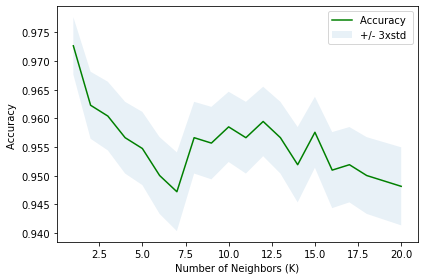

In [118]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

Printing  the K with the highest accuracy

In [119]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9726672950047125 with k= 1


Now I can re-run the KNN module with my best estimated K  on my training set and then predict using my test set

In [120]:
k_best =1

In [121]:
neigh_best = KNeighborsClassifier(n_neighbors = k_best).fit(x1_train,y1_train)
neigh_best

KNeighborsClassifier(n_neighbors=1)

In [122]:
y1hat = neigh_best.predict(x1_test)
y1hat[0:10]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Clustering and K-Mean : 

Clustering is an Unsupervised Machine Learning method of identifying and grouping similar data points in larger datasets without concern for the specific outcome. Clustering (sometimes called cluster analysis) is usually used to classify data into structures that are more easily understood and manipulated. It’s worth keeping in mind that while it’s a popular strategy, clustering isn’t a monolithic term, as there are multiple algorithms that use cluster analysis with different mechanisms. 

For example, with my household dataset (df), and I want to apply a segmentation on this historical data. The segmentation will partition households into groups that have similar characteristics. It is a significant strategy as I can target these specific groups and effectively design and implement specific intervention (provision of goods and services) based on the needs and/or characteristics of each groups. 

K-means clustering is one of the simplest and popular cluster algorithms. I need to   define a target number k, which refers to the number of centroids that I need in the dataset. A centroid is the imaginary or real location representing the center of the cluster. Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares. In other words,  my the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

Below is an illustrative representation of what K-means does

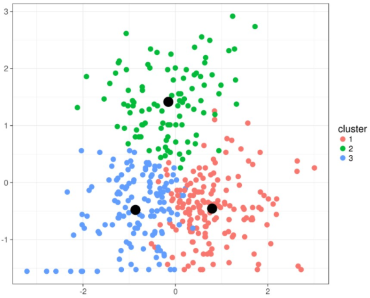

In [123]:
display.Image("C:/Users/Nael/Desktop/Fourth Article/pic2.png")

In [124]:
# My K-mean algorithm is  under development 